In [1]:
#!/usr/bin/env python
#uni2pandas.py - This script is used to convert data from UniProt database format to pandas dataframe.
import click as ck
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import logging
from utils import Ontology, is_exp_code, FUNC_DICT

logging.basicConfig(level=logging.INFO)

ORGS = set(['HUMAN', 'MOUSE', ])


In [3]:

def main(go_file, uniprot_file, filter_exp, prop_annots, out_file):
    go = Ontology(go_file, with_rels=True)
    print(load_data(uniprot_file))
    proteins, accessions, sequences, annotations, interpros, orgs, genes,gene_names = load_data(uniprot_file)
    df = pd.DataFrame({
        'proteins': proteins,
        'accessions': accessions,
        'sequences': sequences,
        'annotations': annotations,
        'interpros': interpros,
        'orgs': orgs,
        'genes': genes,
        'gene_names': gene_names
    })
    # Filter proteins
    df = df[df['orgs'] == '9606']
    logging.info('Filtering proteins with experimental annotations')
    index = []
    annotations = []
    iea_annotations = []
    for i, row in enumerate(df.itertuples()):
        annots = set()
        iea_annots = set()
        for annot in row.annotations:
            go_id, code = annot.split('|')
            anch_set = go.get_anchestors(go_id)
            if is_exp_code(code):
                annots |= anch_set
            iea_annots |= anch_set
        annots = list(annots)
        iea_annots = list(iea_annots)
        annotations.append(annots)
        iea_annotations.append(iea_annots)
    df['exp_annotations'] = annotations
    df['iea_annotations'] = iea_annotations

    df.to_pickle(out_file)
    logging.info('Successfully saved %d proteins' % (len(df),) )
    
def load_data(uniprot_file):
    proteins = list()
    accessions = list()
    sequences = list()
    annotations = list()
    interpros = list()
    orgs = list()
    genes = list()
    gene_names = list()
    with gzip.open(uniprot_file, 'rt') as f:
        prot_id = ''
        prot_ac = ''
        seq = ''
        org = ''
        gene_id = ''
        names = list()
        annots = list()
        ipros = list()
        for line in f:
            items = line.strip().split('   ')
            if items[0] == 'ID' and len(items) > 1:
                if prot_id != '':
                    proteins.append(prot_id)
                    accessions.append(prot_ac)
                    sequences.append(seq)
                    annotations.append(annots)
                    interpros.append(ipros)
                    orgs.append(org)
                    genes.append(gene_id)
                    gene_names.append(names)
                prot_id = items[1]
                annots = list()
                ipros = list()
                names = list()
                seq = ''
                gene_id = ''
            elif items[0] == 'AC' and len(items) > 1:
                prot_ac = items[1]
            elif items[0] == 'OX' and len(items) > 1:
                if items[1].startswith('NCBI_TaxID='):
                    org = items[1][11:]
                    end = org.find(' ')
                    org = org[:end]
                else:
                    org = ''
            elif items[0] == 'GN' and len(items) > 1:
                items = items[1][:-1].split('; ')
                for item in items:
                    if item.startswith('Name='):
                        names.append(item[5:].split()[0])
                    elif item.startswith('Synonyms='):
                        for item in list(item[9:].split(', ')):
                            names.append(item.split()[0])
                    elif item.startswith('ORFNames='):
                        for item in list(item[9:].split(', ')):
                            names.append(item.split()[0])
                    elif item.startswith('OrderedLocusNames='):
                        for item in list(item[9:].split(', ')):
                            names.append(item.split()[0])
            elif items[0] == 'DR' and len(items) > 1:
                items = items[1].split('; ')
                if items[0] == 'GO':
                    go_id = items[1]
                    code = items[3].split(':')[0]
                    annots.append(go_id + '|' + code)
                if items[0] == 'InterPro':
                    ipro_id = items[1]
                    ipros.append(ipro_id)
                if items[0] == 'GeneID':
                    gene_id = items[1]
            elif items[0] == 'SQ':
                seq = next(f).strip().replace(' ', '')
                while True:
                    sq = next(f).strip().replace(' ', '')
                    if sq == '//':
                        break
                    else:
                        seq += sq

        proteins.append(prot_id)
        accessions.append(prot_ac)
        sequences.append(seq)
        annotations.append(annots)
        interpros.append(ipros)
        orgs.append(org)
        genes.append(gene_id)
        gene_names.append(names)
    return proteins, accessions, sequences, annotations, interpros, orgs, genes,gene_names




In [15]:
main('data/go.obo','data/uniprot_sprot.dat.gz',True,True,'data/My_Implementations/swissprot_version.pkl' )

In [24]:
go_file='data/go.obo'
go = Ontology(go_file, with_rels=True)


In [26]:
go.head()

AttributeError: 'Ontology' object has no attribute 'head'

In [ ]:
uniprot_file='data/uniprot_sprot.dat.gz'
dataset=load_data(uniprot_file)


In [8]:
str = unicode(str, errors='replace')

NameError: name 'unicode' is not defined

In [10]:
# df = pd.read_csv('data/two_datasets/data-cafa2.tar.gz', compression='gzip', header=0, sep=' ', 
#                  quotechar='"', error_bad_lines=False,lineterminator='\n',encoding = 'unicode_escape')
# df


import tarfile, zipfile
tarf = tarfile.open( name='data/two_datasets/data-cafa2.tar.gz', mode='r|gz' )
zipf = zipfile.ZipFile( file='data/two_datasets/cafa.zip', mode='a', compression=zipfile.ZIP_DEFLATED )
for m in tarf:
    f = tarf.extractfile( m )
    fl = f.read()
    fn = m.name
    zipf.writestr( fn, fl )
tarf.close()
zipf.close()




KeyboardInterrupt: 

In [6]:
# cafa2='data/two_datasets/data-cafa2.tar.gz'
# dataset=load_data(cafa2)


In [31]:
dataset_np=np.array(dataset)

C:\Users\Mohamed Elhaj-Abdou\Anaconda3-1\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [32]:
dataset_np=np.transpose(dataset_np) 

In [33]:
dataset_np.shape

(561911, 8)

In [28]:
dataset

(['001R_FRG3G',
  '002L_FRG3G',
  '002R_IIV3',
  '003L_IIV3',
  '003R_FRG3G',
  '004R_FRG3G',
  '005L_IIV3',
  '005R_FRG3G',
  '006L_IIV6',
  '006R_FRG3G',
  '007R_FRG3G',
  '007R_IIV3',
  '008L_IIV3',
  '009L_FRG3G',
  '009R_IIV6',
  '010R_FRG3G',
  '011L_IIV3',
  '011R_FRG3G',
  '012L_FRG3G',
  '013L_IIV3',
  '013R_FRG3G',
  '014R_FRG3G',
  '015R_FRG3G',
  '017L_FRG3G',
  '018L_FRG3G',
  '019R_FRG3G',
  '020R_FRG3G',
  '021L_FRG3G',
  '022L_IIV3',
  '023R_FRG3G',
  '023R_IIV3',
  '024R_FRG3G',
  '025R_IIV3',
  '026R_IIV6',
  '027R_FRG3G',
  '028R_FRG3G',
  '028R_IIV3',
  '029L_FRG3G',
  '029R_IIV6',
  '030L_IIV3',
  '030R_FRG3G',
  '031R_FRG3G',
  '032R_FRG3G',
  '032R_IIV3',
  '032R_IIV6',
  '033R_FRG3G',
  '034R_FRG3G',
  '034R_IIV6',
  '035L_FRG3G',
  '036L_FRG3G',
  '037L_IIV3',
  '037R_FRG3G',
  '039R_FRG3G',
  '040R_FRG3G',
  '040R_IIV3',
  '041L_IIV6',
  '041R_FRG3G',
  '042L_FRG3G',
  '042R_IIV6',
  '043L_IIV6',
  '043R_FRG3G',
  '044L_IIV3',
  '044R_FRG3G',
  '044R_IIV6',
  

In [34]:
dframe = pd.DataFrame(dataset_np)  

In [37]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561911 entries, 0 to 561910
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       561911 non-null  object
 1   1       561911 non-null  object
 2   2       561911 non-null  object
 3   3       561911 non-null  object
 4   4       561911 non-null  object
 5   5       561911 non-null  object
 6   6       561911 non-null  object
 7   7       561911 non-null  object
dtypes: object(8)
memory usage: 34.3+ MB


In [38]:
dframe

,0,1,2,3,4,5,6,7
0,001R_FRG3G,Q6GZX4;,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...,[GO:0046782|IEA],[IPR007031],654924,2947773,[FV3-001R]
1,002L_FRG3G,Q6GZX3;,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...,"[GO:0033644|IEA, GO:0016021|IEA]",[IPR004251],654924,2947774,[FV3-002L]
2,002R_IIV3,Q197F8;,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...,[],[],345201,4156251,[IIV3-002R]
3,003L_IIV3,Q197F7;,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...,[],[],345201,4156252,[IIV3-003L]
4,003R_FRG3G,Q6GZX2;,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...,[],[],654924,2947775,[FV3-003R]
...,...,...,...,...,...,...,...,...
561906,Z_SABVB,Q6UY62;,MGNSKSKSKLSANQYEQQTVNSTKQVAILKRQAEPSLYGRHNCRCC...,"[GO:0044220|IEA, GO:0020002|IEA, GO:0016020|IE...","[IPR024183, IPR038485, IPR003224]",2169992,3077249,[Z]
561907,Z_SHEEP,P08105;,MSSSLEITSFYSFIWTPHIGPLLFGIGLWFSMFKEPSHFCPCQHPH...,[],[],9940,,[]
561908,Z_TACVF,Q88470;,MGNCNRTQKPSSSSNNLEKPPQAAEFRRTAEPSLYGRYNCKCCWFA...,"[GO:0044220|IEA, GO:0020002|IEA, GO:0016020|IE...","[IPR024183, IPR038485, IPR003224]",928313,956594,[Z]
561909,Z_TAMVU,A9JR22;,MGLRYSKEVRDRHGDKDPEGRIPITQTMPQTLYGRYNCKSCWFANK...,"[GO:0044220|IEA, GO:0020002|IEA, GO:0016020|IE...","[IPR024183, IPR038485, IPR003224]",45223,6301276,[Z]


In [ ]:
proteins, accessions, sequences, annotations, interpros, orgs, genes,gene_names

In [40]:
dframe = dframe.rename(columns={0: 'proteins',1: 'accessions',2: 'sequences',
                                
                                3: 'annotations',4: 'interpros',5: 'orgs',
                                
                                6: 'genes',7: 'gene_names',})
dframe

,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names
0,001R_FRG3G,Q6GZX4;,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...,[GO:0046782|IEA],[IPR007031],654924,2947773,[FV3-001R]
1,002L_FRG3G,Q6GZX3;,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...,"[GO:0033644|IEA, GO:0016021|IEA]",[IPR004251],654924,2947774,[FV3-002L]
2,002R_IIV3,Q197F8;,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...,[],[],345201,4156251,[IIV3-002R]
3,003L_IIV3,Q197F7;,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...,[],[],345201,4156252,[IIV3-003L]
4,003R_FRG3G,Q6GZX2;,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...,[],[],654924,2947775,[FV3-003R]
...,...,...,...,...,...,...,...,...
561906,Z_SABVB,Q6UY62;,MGNSKSKSKLSANQYEQQTVNSTKQVAILKRQAEPSLYGRHNCRCC...,"[GO:0044220|IEA, GO:0020002|IEA, GO:0016020|IE...","[IPR024183, IPR038485, IPR003224]",2169992,3077249,[Z]
561907,Z_SHEEP,P08105;,MSSSLEITSFYSFIWTPHIGPLLFGIGLWFSMFKEPSHFCPCQHPH...,[],[],9940,,[]
561908,Z_TACVF,Q88470;,MGNCNRTQKPSSSSNNLEKPPQAAEFRRTAEPSLYGRYNCKCCWFA...,"[GO:0044220|IEA, GO:0020002|IEA, GO:0016020|IE...","[IPR024183, IPR038485, IPR003224]",928313,956594,[Z]
561909,Z_TAMVU,A9JR22;,MGLRYSKEVRDRHGDKDPEGRIPITQTMPQTLYGRYNCKSCWFANK...,"[GO:0044220|IEA, GO:0020002|IEA, GO:0016020|IE...","[IPR024183, IPR038485, IPR003224]",45223,6301276,[Z]


In [48]:
orgs=dframe['orgs'].unique()

In [49]:
len(orgs)

13875

In [1]:
dframe.to_csv('Original_dataset_all.csv',index=False)

NameError: name 'dframe' is not defined

In [ ]:
orgs=dframe['orgs'].unique()

In [4]:
dframe=pd.read_csv('Original_dataset_all.csv')

In [5]:
dframe.head(5)

,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names
0,001R_FRG3G,Q6GZX4;,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...,['GO:0046782|IEA'],['IPR007031'],654924,2947773.0,['FV3-001R']
1,002L_FRG3G,Q6GZX3;,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...,"['GO:0033644|IEA', 'GO:0016021|IEA']",['IPR004251'],654924,2947774.0,['FV3-002L']
2,002R_IIV3,Q197F8;,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...,[],[],345201,4156251.0,['IIV3-002R']
3,003L_IIV3,Q197F7;,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...,[],[],345201,4156252.0,['IIV3-003L']
4,003R_FRG3G,Q6GZX2;,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...,[],[],654924,2947775.0,['FV3-003R']


In [6]:
Orgs=dframe['orgs'].value_counts()
Orgs

9606      20365
10090     17033
3702      15940
10116      8091
559292     6721
          ...  
500182        1
74502         1
109335        1
349064        1
46360         1
Name: orgs, Length: 13875, dtype: int64

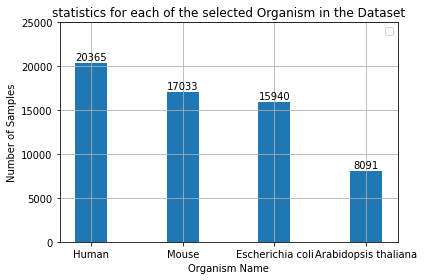

In [29]:

labels = ['Human', 'Mouse','Escherichia coli','Arabidopsis thaliana',]
number_of_samples = [20365, 17033,15940,8091]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects1 = ax.bar(labels, number_of_samples, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Organism Name')
ax.set_ylabel('Number of Samples')
ax.set_title('statistics for each of the selected Organism in the Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)
fig.tight_layout()
ax.set_ylim(0,25000)
plt.grid()
# plt.savefig('Figure 1 statistics of the training and test dataset.pdf')
plt.show()

In [14]:
Orgs.shape

(13875,)

In [15]:
Orgs=dframe['orgs'].unique()
len(Orgs)

13875

In [30]:
hp = Ontology('data/hp.obo', with_rels=True)


In [32]:
hp

In [11]:
main('data/go.obo','data/uniprot_sprot.dat.gz',True,True,'data/My_Implementations/swissprot_version.pkl' )

....31


INFO:root:Filtering proteins with experimental annotations
INFO:root:Successfully saved 20365 proteins


In [19]:
# unpickled_df = pd.read_pickle('data/My_Implementations/swissprot_version.pkl')
# unpickled_df

In [21]:
unpickled_df['orgs'].unique()

array(['9606'], dtype=object)

In [14]:
unpickled_df

,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names,exp_annotations,iea_annotations
321,1433B_HUMAN,P31946; A8K9K2; E1P616;,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,"[GO:0005737|IDA, GO:0005829|IDA, GO:0070062|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7529,[YWHAB],"[GO:0008150, GO:0007006, GO:0035329, GO:000718...","[GO:0008150, GO:0007006, GO:0035329, GO:000718..."
338,1433E_HUMAN,P62258; B3KY71; D3DTH5; P29360; P42655; Q4VJB6...,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,"[GO:0005623|IEA, GO:0090724|IEA, GO:0005737|ID...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7531,[YWHAE],"[GO:0005261, GO:0043066, GO:0008150, GO:000700...","[GO:0005261, GO:0043066, GO:0008150, GO:000700..."
344,1433F_HUMAN,Q04917;,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...,"[GO:0005737|ISS, GO:0005829|TAS, GO:0070062|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7533,"[YWHAH, YWHA1]","[GO:0005261, GO:0086010, GO:0031958, GO:000815...","[GO:0005261, GO:0086010, GO:0051093, GO:000815..."
350,1433G_HUMAN,P61981; O70457; P35214; Q6FH52; Q9UDP2; Q9UN99;,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,"[GO:0005829|TAS, GO:0070062|HDA, GO:0005925|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7532,[YWHAG],"[GO:0008150, GO:0007006, GO:0032501, GO:000701...","[GO:0008150, GO:0007006, GO:0032501, GO:000701..."
356,1433S_HUMAN,P31947; Q6FH30; Q6FH51; Q96DH0;,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,"[GO:0005829|IDA, GO:0070062|HDA, GO:0005615|TA...","[IPR000308, IPR023409, IPR036815, IPR023410, I...",9606,2810,"[SFN, HME1]","[GO:0004860, GO:0043066, GO:0008150, GO:000700...","[GO:0043066, GO:0008150, GO:0007006, GO:003250..."
...,...,...,...,...,...,...,...,...,...,...
561865,ZY11A_HUMAN,Q6WRX3; A6NCK5;,MVHFLHPGHTPRNIVPPDAQKDALGCCVVQEEASPYTLVNICLNVL...,[GO:0031462|IBA],"[IPR011989, IPR016024, IPR032675]",9606,440590,"[ZYG11A, ZYG11]",[],"[GO:0044464, GO:1902494, GO:0005622, GO:000015..."
561867,ZY11B_HUMAN,Q9C0D3; Q8N2X3; Q9H8L8;,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...,"[GO:0031462|IDA, GO:0032436|IMP, GO:0006515|IMP]","[IPR011989, IPR016024, IPR001611, IPR032675, I...",9606,79699,"[ZYG11B, KIAA1730]","[GO:0044267, GO:0008150, GO:0030163, GO:003016...","[GO:0044267, GO:0008150, GO:0030163, GO:003016..."
561880,ZYX_HUMAN,Q15942; A4D2G6; B4DQX7; Q6I9S4;,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,"[GO:0005737|IBA, GO:0005829|IDA, GO:0005925|ID...",[IPR001781],9606,7791,[ZYX],"[GO:0030029, GO:0008150, GO:0043226, GO:000701...","[GO:0030029, GO:0008150, GO:0043226, GO:000701..."
561884,ZZEF1_HUMAN,O43149; A7MBM5; Q6NXG0; Q6ZRA1; Q6ZSF4; Q9NVB9;,MGNAPSHSSEDEAAAAGGEGWGPHQDWAAVSGTTPGPGVAAPALPP...,"[GO:0005509|IEA, GO:0008270|IEA]","[IPR004939, IPR011992, IPR002048, IPR008979, I...",9606,23140,"[ZZEF1, KIAA0399]",[],"[GO:0003674, GO:0046914, GO:0005488, GO:004316..."


In [17]:
unpickled_df = pd.read_pickle('data/swissprot.pkl')

In [18]:
unpickled_df

,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names,exp_annotations,iea_annotations
318,1433B_HUMAN,P31946; A8K9K2; E1P616;,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,"[GO:0005737|IDA, GO:0005829|IDA, GO:0070062|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7529,[YWHAB],"[GO:0010648, GO:1905477, GO:0010608, GO:004426...","[GO:0010648, GO:0044260, GO:0008637, GO:007184..."
335,1433E_HUMAN,Q7M4R4;,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,"[GO:0090724|IEA, GO:0005737|IDA, GO:0005829|TA...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7531,[YWHAE],"[GO:0034220, GO:0086013, GO:0051051, GO:004426...","[GO:0034220, GO:0086013, GO:0051051, GO:004426..."
341,1433F_HUMAN,Q04917;,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...,"[GO:0005737|ISS, GO:0005829|TAS, GO:0070062|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7533,"[YWHAH, YWHA1]","[GO:1905477, GO:0034220, GO:0044260, GO:007088...","[GO:0034220, GO:0044260, GO:0050804, GO:005109..."
347,1433G_HUMAN,P61981; O70457; P35214; Q6FH52; Q9UDP2; Q9UN99;,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,"[GO:0005829|TAS, GO:0070062|HDA, GO:0005925|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7532,[YWHAG],"[GO:1905477, GO:0050804, GO:0000278, GO:000863...","[GO:0044260, GO:0050804, GO:0008637, GO:007184..."
353,1433S_HUMAN,P31947; Q6FH30; Q6FH51; Q96DH0;,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,"[GO:0005829|IDA, GO:0070062|HDA, GO:0005615|TA...","[IPR000308, IPR023409, IPR036815, IPR023410, I...",9606,2810,"[SFN, HME1]","[GO:1905477, GO:0097153, GO:0044260, GO:007242...","[GO:0044260, GO:0072422, GO:0045930, GO:003250..."
...,...,...,...,...,...,...,...,...,...,...
559588,ZY11A_HUMAN,Q6WRX3; A6NCK5;,MVHFLHPGHTPRNIVPPDAQKDALGCCVVQEEASPYTLVNICLNVL...,[GO:0031462|IBA],"[IPR011989, IPR016024, IPR032675]",9606,440590,"[ZYG11A, ZYG11]",[],"[GO:1990234, GO:1902494, GO:0032991, GO:004446..."
559590,ZY11B_HUMAN,Q9C0D3; Q8N2X3; Q9H8L8;,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...,[GO:0031462|IBA],"[IPR011989, IPR016024, IPR001611, IPR032675, I...",9606,79699,"[ZYG11B, KIAA1730]",[],"[GO:1990234, GO:1902494, GO:0032991, GO:004446..."
559603,ZYX_HUMAN,Q15942; A4D2G6; B4DQX7; Q6I9S4;,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...,"[GO:0005913|IDA, GO:0005829|IDA, GO:0005925|ID...",[IPR001781],9606,7791,[ZYX],"[GO:0044444, GO:0070887, GO:0071840, GO:005101...","[GO:0044444, GO:0051707, GO:0030139, GO:007088..."
559607,ZZEF1_HUMAN,O43149; A7MBM5; Q6NXG0; Q6ZRA1; Q6ZSF4; Q9NVB9;,MGNAPSHSSEDEAAAAGGEGWGPHQDWAAVSGTTPGPGVAAPALPP...,"[GO:0005509|IEA, GO:0008270|IEA]","[IPR004939, IPR011992, IPR002048, IPR008979, I...",9606,23140,"[ZZEF1, KIAA0399]",[],"[GO:0005488, GO:0005509, GO:0046872, GO:004316..."


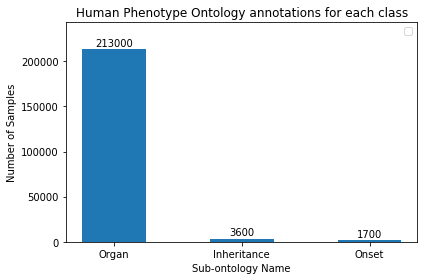

In [8]:

labels = ['Organ', 'Inheritance','Onset']
number_of_samples = [213000, 3600,1700]

x = np.arange(len(labels))  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects1 = ax.bar(labels, number_of_samples, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sub-ontology Name')
ax.set_ylabel('Number of Samples')
ax.set_title('Human Phenotype Ontology annotations for each class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
# autolabel(rects2)
fig.tight_layout()
ax.set_ylim(0,243000)
# plt.grid()
# plt.savefig('Figure 1 statistics of the training and test dataset.pdf')
plt.show()

In [ ]:
import numpy as np 
def sig(x):
 return 1/(1 + np.exp(-x))
 
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 50)   
p = sig(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()

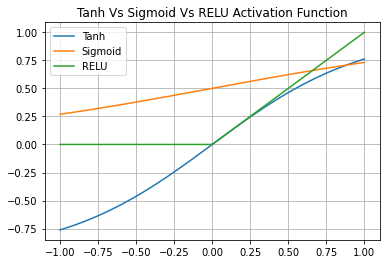

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperbolic Tangent (htan) Activation Function
def Tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1



def Sigmoid(x):
 return 1/(1 + np.exp(-x))


# Generating data for Graph
x_data = np.linspace(-6,6,100)
Tanh = Tanh(x_data)
Sigmoid = Sigmoid(x_data)
RELU=RELU(x_data)
# Graph
plt.plot(x_data, Tanh, x_data, Sigmoid,x_data,RELU)
plt.title('Tanh Vs Sigmoid Vs RELU Activation Function')
plt.legend(['Tanh','Sigmoid','RELU'])
plt.grid()
plt.show()

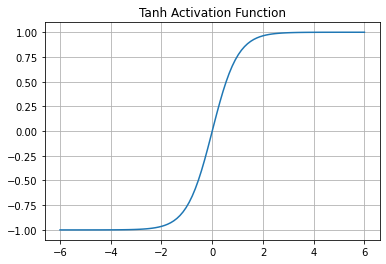

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperbolic Tangent (htan) Activation Function
def Tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1



def Sigmoid(x):
 return 1/(1 + np.exp(-x))


# Generating data for Graph
x_data = np.linspace(-6,6,100)
Tanh = Tanh(x_data)
Sigmoid = Sigmoid(x_data)
RELU=RELU(x_data)
# Graph
plt.plot(x_data, Tanh)
plt.title('Tanh Activation Function')
# plt.legend(['Tanh','Sigmoid','RELU'])
plt.grid()
plt.show()

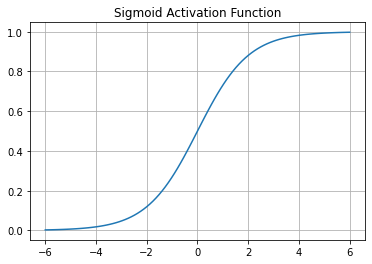

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperbolic Tangent (htan) Activation Function
def Tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1



def Sigmoid(x):
 return 1/(1 + np.exp(-x))


# Generating data for Graph
x_data = np.linspace(-6,6,100)
Tanh = Tanh(x_data)
Sigmoid = Sigmoid(x_data)
RELU=RELU(x_data)
# Graph
plt.plot(x_data, Sigmoid)
plt.title('Sigmoid Activation Function')
# plt.legend(['Tanh','Sigmoid','RELU'])
plt.grid()
plt.show()

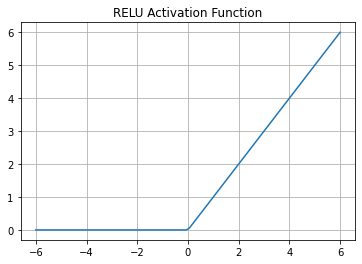

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperbolic Tangent (htan) Activation Function
def Tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1



def Sigmoid(x):
 return 1/(1 + np.exp(-x))


# Generating data for Graph
x_data = np.linspace(-6,6,100)
Tanh = Tanh(x_data)
Sigmoid = Sigmoid(x_data)
RELU=RELU(x_data)
# Graph
plt.plot(x_data, RELU)
plt.title('RELU Activation Function')
# plt.legend(['Tanh','Sigmoid','RELU'])
plt.grid()
plt.show()

In [2]:
Proposed_system = [0.168,  0.448, 0.147,0.078, 0.514, 52.203]
CNN = [0.164,0.164,0..165,0.085,0.527,52.245]
LSTM = [0.158,0.132,0.196,0.076,0.515,52.241]

SyntaxError: invalid syntax (<ipython-input-2-2ef020b3c7f5>, line 2)

[0.25, 1.25, 2.25, 3.25, 4.25]


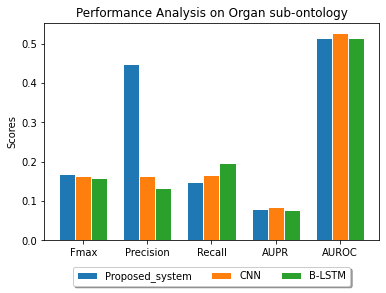

In [13]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25



0.164
0.168



# set height of bar
Proposed_system = [0.168,  0.448, 0.147,0.078, 0.514]
CNN = [0.164,0.164,0.165,0.085,0.527]
LSTM = [0.158,0.132,0.196,0.076,0.515]

fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(Proposed_system))

r2 = [x + barWidth for x in r1]

r3 = [x + barWidth for x in r2]

print(r2)
# Make the plot
# plt.bar(r1, Random_Forest, width=barWidth, edgecolor='white', label='Random_Forest')
# plt.bar(r2, XGBoost, width=barWidth, edgecolor='white', label='XGBoost')
# plt.bar(r3, Decision_Tree, width=barWidth, edgecolor='white', label='Decision_Tree')
ax.bar(r1, Proposed_system, width=barWidth, edgecolor='white', label='Proposed_system')
ax.bar(r2, CNN, width=barWidth, edgecolor='white', label='CNN')
ax.bar(r3, LSTM, width=barWidth, edgecolor='white', label='B-LSTM')
# ax.ylim(0,100)
# ax.set_ylim([0,100])
# Add xticks on the middle of the group bars
# plt.xlabel('group')
ax.set_ylabel('Scores')
ax.set_title('Performance Analysis on Organ sub-ontology')
# ax.set_xticklabels([r + barWidth for r in range(len(Random_Forest))], ['F1-Score', 'Precision', 'Recall'])
# ax.set_xticklabels(['F1-Score', 'Precision', 'Recall'])
ax.set_xticks([r + barWidth for r in range(len(Proposed_system))])
ax.set_xticklabels(['Fmax', 'Precision','Recall', 'AUPR', 'AUROC'])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

# plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')

plt.show()

[0.25, 1.25, 2.25, 3.25, 4.25]


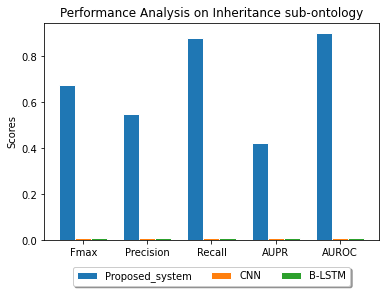

In [18]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25



0.164
0.168



# set height of bar
Proposed_system = [0.676,0.549,0.879,0.423,0.90]
CNN = [0.01,0.01,0.01,0.01,0.01]
LSTM = [0.01,0.01,0.01,0.01,0.01]

fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(Proposed_system))

r2 = [x + barWidth for x in r1]

r3 = [x + barWidth for x in r2]

print(r2)
# Make the plot
# plt.bar(r1, Random_Forest, width=barWidth, edgecolor='white', label='Random_Forest')
# plt.bar(r2, XGBoost, width=barWidth, edgecolor='white', label='XGBoost')
# plt.bar(r3, Decision_Tree, width=barWidth, edgecolor='white', label='Decision_Tree')
ax.bar(r1, Proposed_system, width=barWidth, edgecolor='white', label='Proposed_system')
ax.bar(r2, CNN, width=barWidth, edgecolor='white', label='CNN')
ax.bar(r3, LSTM, width=barWidth, edgecolor='white', label='B-LSTM')
# ax.ylim(0,100)
# ax.set_ylim([0,100])
# Add xticks on the middle of the group bars
# plt.xlabel('group')
ax.set_ylabel('Scores')
ax.set_title('Performance Analysis on Inheritance sub-ontology')
# ax.set_xticklabels([r + barWidth for r in range(len(Random_Forest))], ['F1-Score', 'Precision', 'Recall'])
# ax.set_xticklabels(['F1-Score', 'Precision', 'Recall'])
ax.set_xticks([r + barWidth for r in range(len(Proposed_system))])
ax.set_xticklabels(['Fmax', 'Precision','Recall', 'AUPR', 'AUROC'])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

# plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')

plt.show()

[0.25, 1.25, 2.25, 3.25, 4.25]


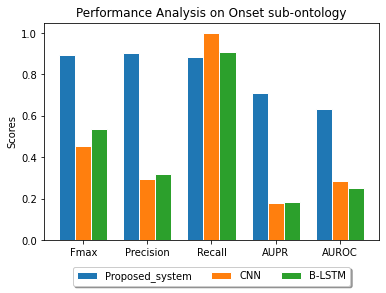

In [17]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.25






# set height of bar
Proposed_system = [0.894,0.902,0.886,0.711,0.631]
CNN = [0.453,0.293,1,0.181,0.284]
LSTM = [0.538,0.32,0.91,0.182,0.251]

fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(Proposed_system))

r2 = [x + barWidth for x in r1]

r3 = [x + barWidth for x in r2]

print(r2)
# Make the plot
# plt.bar(r1, Random_Forest, width=barWidth, edgecolor='white', label='Random_Forest')
# plt.bar(r2, XGBoost, width=barWidth, edgecolor='white', label='XGBoost')
# plt.bar(r3, Decision_Tree, width=barWidth, edgecolor='white', label='Decision_Tree')
ax.bar(r1, Proposed_system, width=barWidth, edgecolor='white', label='Proposed_system')
ax.bar(r2, CNN, width=barWidth, edgecolor='white', label='CNN')
ax.bar(r3, LSTM, width=barWidth, edgecolor='white', label='B-LSTM')
# ax.ylim(0,100)
# ax.set_ylim([0,100])
# Add xticks on the middle of the group bars
# plt.xlabel('group')
ax.set_ylabel('Scores')
ax.set_title('Performance Analysis on Onset sub-ontology')
# ax.set_xticklabels([r + barWidth for r in range(len(Random_Forest))], ['F1-Score', 'Precision', 'Recall'])
# ax.set_xticklabels(['F1-Score', 'Precision', 'Recall'])
ax.set_xticks([r + barWidth for r in range(len(Proposed_system))])
ax.set_xticklabels(['Fmax', 'Precision','Recall', 'AUPR', 'AUROC'])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

# plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')

plt.show()

[0.35, 1.35, 2.35]


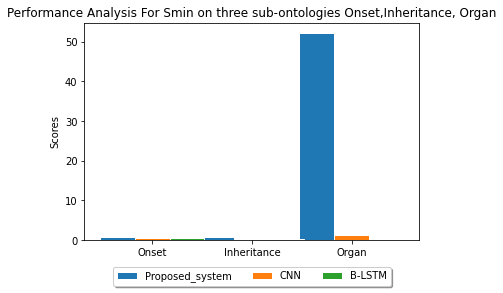

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# set width of bar
barWidth = 0.35






# set height of bar
Proposed_system = [0.894,0.902,52.203]
CNN = [0.453,0.293,1.290]
LSTM = [0.538,0.32,0.384]

fig, ax = plt.subplots()
# Set position of bar on X axis
r1 = np.arange(len(Proposed_system))

r2 = [x + barWidth for x in r1]

r3 = [x + barWidth for x in r2]

print(r2)
# Make the plot
# plt.bar(r1, Random_Forest, width=barWidth, edgecolor='white', label='Random_Forest')
# plt.bar(r2, XGBoost, width=barWidth, edgecolor='white', label='XGBoost')
# plt.bar(r3, Decision_Tree, width=barWidth, edgecolor='white', label='Decision_Tree')
ax.bar(r1, Proposed_system, width=barWidth, edgecolor='white', label='Proposed_system')
ax.bar(r2, CNN, width=barWidth, edgecolor='white', label='CNN')
ax.bar(r3, LSTM, width=barWidth, edgecolor='white', label='B-LSTM')
# ax.ylim(0,100)
# ax.set_ylim([0,100])
# Add xticks on the middle of the group bars
# plt.xlabel('group')
ax.set_ylabel('Scores')
ax.set_title('Performance Analysis For Smin on three sub-ontologies Onset,Inheritance, Organ')
# ax.set_xticklabels([r + barWidth for r in range(len(Random_Forest))], ['F1-Score', 'Precision', 'Recall'])
# ax.set_xticklabels(['F1-Score', 'Precision', 'Recall'])
ax.set_xticks([r + barWidth for r in range(len(Proposed_system))])
ax.set_xticklabels(['Onset', 'Inheritance','Organ'])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)


# plt.grid()
# plt.savefig('Figure3 Performance evaluation using F1 score precision and recall against proposed algorithms.pdf')

plt.show()

[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (7).

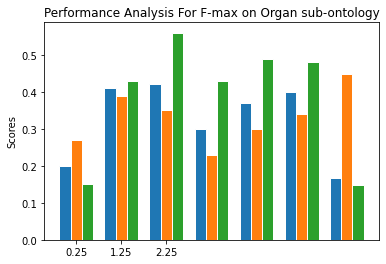

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
 
width = 0.4
fig, ax = plt.subplots()

# Example data
labels = ('j48', 'Naive Bayes(NB)', 'NB Tree', 'Random Forest', 'Random Tree', 
          'Multi-layer perceptron', 'Support Vector Machine', 'DNN(6 features)','proposed method')
rects1 = ax.barh('Pj48', 81.05, width)
rects2 = ax.barh('Naive Bayes(NB)', 76.56, width)
rects3 = ax.barh('NB Tree', 82.02, width)
rects4 = ax.barh('Random Forest', 80.67, width)
rects5 = ax.barh('Random Tree', 81.59, width)
rects6 = ax.barh('Multi-layer perceptron', 77.41, width)
rects7 = ax.barh('Support Vector Machine', 69.52, width)
rects8 = ax.barh('DNN(6 features)', 75.75, width)
rects9 = ax.barh('proposed method', 95.55, width)

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(1.08*rect.get_width(), rect.get_y()+0.9*rect.get_height(),
#                  '%d' % int(width),
                 '{}%'.format(width),
                 ha='center', va='center')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
# fig.tight_layout()
y_pos = np.arange(len(people))
ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance')
ax.set_title('Accuracy Comparison')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlim(0,110)

plt.grid()

# plt.savefig('F:/freelance/Conference/Figures/Figure 8 Accuracy comparison between our proposed method and other algorithms.png', bbox_inches='tight')

# plt.savefig('F:/freelance/Conference/Figures/Figure 8 Accuracy comparison between our proposed method and other algorithms.pdf', bbox_inches='tight')

plt.show()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# 

# plt.grid()
# plt.legend()
# plt.show()
#blue 